# Lab 3 - Visualization

Last update: 11/11/2023

- Name: Nguyen Tuan Thanh
- Student ID: 21127166

***

## Work and submission guidelines

**Work on your assignment**

- You need to do your assignment directly in this notebook. First, fill out your name and ID at the beginning of the file. In the notebook, fill in places that say:
```python
#TODO
```

- During your work, you can print out the result, create more cells to test, or create more functions to handle things. Please note that <font color=red>you are not allowed to delete or modify my code cells</font> (except in the case that mentioned above). Remember to remove `raise NotImplementedError("not implement")` when running the code.

- Always press `Ctrl + S` in order to save your work.

**Notes:**

    *  Copy means zero
    *  You have to submit your work on time. No exception
    *  Any questions about your grade are based on the assignment submitted on Moodle
    *  Wrong submission takes you -2 points

**Submit your work**

- When grading your assignment, I will choose `Kernel` - `Restart Kernel & Run All Cells` in order to restart the kernel and run all cells in your notebook. Therefore, you should do that before submitting to ensure that the outputs are all as expected.

- After that, rename you notebook with your student ID (e.g. `1234567.ipynb`) and submit on Moodle.

- <font color=red>Please strictly follow the submission rules.</font>

## Abstract and general requirements

**Abstract**

- In this assignment, you are required to visualize data and results. This task is very important since it provides reader (your clients, your boss,...) an overview of the data as well as your results.

- You will visualize the data in order to answer some questions. By answering these questions, you are able to get some insights from data.

- You will also visualize the results of machine learning model to be able to know whether your model works well or not.

**General requirements**

- Every charts **must have their own name, axes name, legends**.
- The charts you draw must not only be correct but also beautiful:
    - The correctness is shown in choosing the right chart and accurately calculating the data to draw the chart.
    - The beauty is expressed in the UI/UX of the chart. The beauty of UI is shown in choosing the colors, layout of the chart. The beauty of UX is reflected in the fact that the reader can easily capture your message conveyed through your notebook.

---

In [1]:
# visialize stuff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import json
# !pip install geopandas
import geopandas

# modeling stuff
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import random

## Data visualization

- In this section, you are going to compute and visualize some information about Covid-19
- The data prepared in `./data` was collected from Worldometer
- Link: https://www.worldometers.info/coronavirus/

In [2]:
# read the data into a dataframe
df = pd.read_csv('./data/data.csv')
print(f'Shape: {df.shape}')
df.head(5)

Shape: (219, 10)


,Country Name,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population
0,USA,"31,990,143",NaN,"576,298",NaN,"24,560,856","6,852,989","9,321","420,822,699","332,516,170"
1,India,"13,689,453","+3,380","171,089",NaN,"12,253,697","1,264,667","8,944","259,207,108","1,390,568,032"
2,Brazil,"13,521,409",NaN,"355,031",NaN,"11,957,068","1,209,310","8,318","28,600,000","213,737,070"
3,France,"5,067,216",NaN,"99,135",NaN,"310,934","4,657,147","5,916","70,140,847","65,386,285"
4,Russia,"4,657,883","+8,173","103,601",338.0,"4,281,776","272,506","2,300","124,100,000","145,983,351"


### Requrement #1: Preprocess

- **TODO**: Take a look at the data files, then go to the URL aforementioned, explore the meaning of columns in the dataset and fill in the blanks:
    - Country Name: The name of the country.
    - Total Cases: The total number of confirmed COVID-19 cases in the country.
    - New Cases: The number of new confirmed COVID-19 cases in the country since the last update.
    - Total Deaths: The total number of deaths from COVID-19 in the country.
    - New Deaths: The number of new deaths from COVID-19 in the country since the last update.
    - Total Recovered: The total number of people who have recovered from COVID-19 in the country.
    - Active Cases: The number of people who are currently infected with COVID-19 in the country.
    - Critical Cases: The number of people who are currently in critical condition with COVID-19 in the country.
    - Total Tests: The total number of COVID-19 tests that have been conducted in the country.
    - Population: The estimated population of the country.

- Check the data with `info()` function

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    object 
 2   New Cases        46 non-null     object 
 3   Total Deaths     219 non-null    object 
 4   New Deaths       32 non-null     float64
 5   Total Recovered  217 non-null    object 
 6   Active Cases     217 non-null    object 
 7   Critical Cases   146 non-null    object 
 8   Total Tests      210 non-null    object 
 9   Population       219 non-null    object 
dtypes: float64(1), object(9)
memory usage: 17.2+ KB


- You can see that `New Cases`, `New Deaths`, `Critical Cases` have a lot of missing data (at least 33.3%). Therefore, we have to remove these columns.
- Most of data in columns are `object` type, which are not suitable at all. They should be converted to integer.
- `Total Recovered`, `Active Cases` and `Total Tests` only have a few missing values, so we can fill in these missing values with median value of each column.

In [4]:
# TODO: drop New Cases, New Deaths, Critical Cases
df = df.drop(['New Cases', 'New Deaths', 'Critical Cases'], axis=1)

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country Name     219 non-null    object
 1   Total Cases      219 non-null    object
 2   Total Deaths     219 non-null    object
 3   Total Recovered  217 non-null    object
 4   Active Cases     217 non-null    object
 5   Total Tests      210 non-null    object
 6   Population       219 non-null    object
dtypes: object(7)
memory usage: 12.1+ KB


In [5]:
import re

def preprocess(x):
    if isinstance(x, str):
        x = re.sub('[^0-9]', '', x)  # This will keep only numbers in the string
        if x == '':
            return None
    return x

features = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Tests', 'Population']
for feature in features:
    df[feature] = df[feature].map(preprocess)

df[features] = df[features].apply(pd.to_numeric, errors='coerce').astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country Name     219 non-null    object
 1   Total Cases      219 non-null    Int64 
 2   Total Deaths     204 non-null    Int64 
 3   Total Recovered  217 non-null    Int64 
 4   Active Cases     217 non-null    Int64 
 5   Total Tests      210 non-null    Int64 
 6   Population       219 non-null    Int64 
dtypes: Int64(6), object(1)
memory usage: 13.4+ KB


**TODO**: We did handle missing value before. Why do we still have missing values here?

Data that is not consistent or is incorrectly formatted may be converted to missing values during processing.

In [6]:
df.head()

,Country Name,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,31990143,576298,24560856,6852989,420822699,332516170
1,India,13689453,171089,12253697,1264667,259207108,1390568032
2,Brazil,13521409,355031,11957068,1209310,28600000,213737070
3,France,5067216,99135,310934,4657147,70140847,65386285
4,Russia,4657883,103601,4281776,272506,124100000,145983351


In [7]:
from sklearn.impute import SimpleImputer

features = ['Total Deaths', 'Total Recovered', 'Active Cases', 'Total Tests']
imputer = SimpleImputer(strategy='median')
imputer.fit(df[features])
df[features] = imputer.transform(df[features])

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    Int64  
 2   Total Deaths     219 non-null    float64
 3   Total Recovered  219 non-null    float64
 4   Active Cases     219 non-null    float64
 5   Total Tests      219 non-null    float64
 6   Population       219 non-null    Int64  
dtypes: Int64(2), float64(4), object(1)
memory usage: 12.5+ KB


c:\Users\Thanh\anaconda3\envs\env\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Thanh\anaconda3\envs\env\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Thanh\anaconda3\envs\env\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Thanh\anaconda3\envs\env\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(

**TODO**: Why do we have `float64` here?

Pandas automatically converts a column to float64 when it fills in missing values with a non-integer value, even if the column's original data type was int64. This happens because Pandas uses a sentinel value called NaN (Not a Number) to represent missing values. NaN is a float64 value, and when Pandas fills in missing values with NaN, it automatically converts the column to float64 to accommodate this non-integer value.

In [8]:
# TODO: save your new data frame to `./data/new_data.csv`
df.to_csv('./data/new_data.csv', index=False)

In [9]:
# TEST
file = open('./data/new_data.csv', 'r')
new_data = file.read()
file.close()

file = open('./data/correct_data.csv', 'r')
correct_data = file.read()
file.close()

assert new_data == correct_data

### Requirement #2: Visualize single variable

- For now, if you do not pass the test, you have to work on the correct file by un-commenting the cell code below to read the `./data/correct_data.csv` into `df`
- You are going to draw 6 bar charts which show all the fields of dataset. For each bar chart, sort the values of countries in descending order and only visualize 5 countries

In [10]:
# # un-comment these lines of code
df = pd.read_csv('./data/correct_data.csv')

df.head()

,Country Name,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,31990143,576298.0,24560856.0,6852989.0,420822699.0,332516170
1,India,13689453,171089.0,12253697.0,1264667.0,259207108.0,1390568032
2,Brazil,13521409,355031.0,11957068.0,1209310.0,28600000.0,213737070
3,France,5067216,99135.0,310934.0,4657147.0,70140847.0,65386285
4,Russia,4657883,103601.0,4281776.0,272506.0,124100000.0,145983351


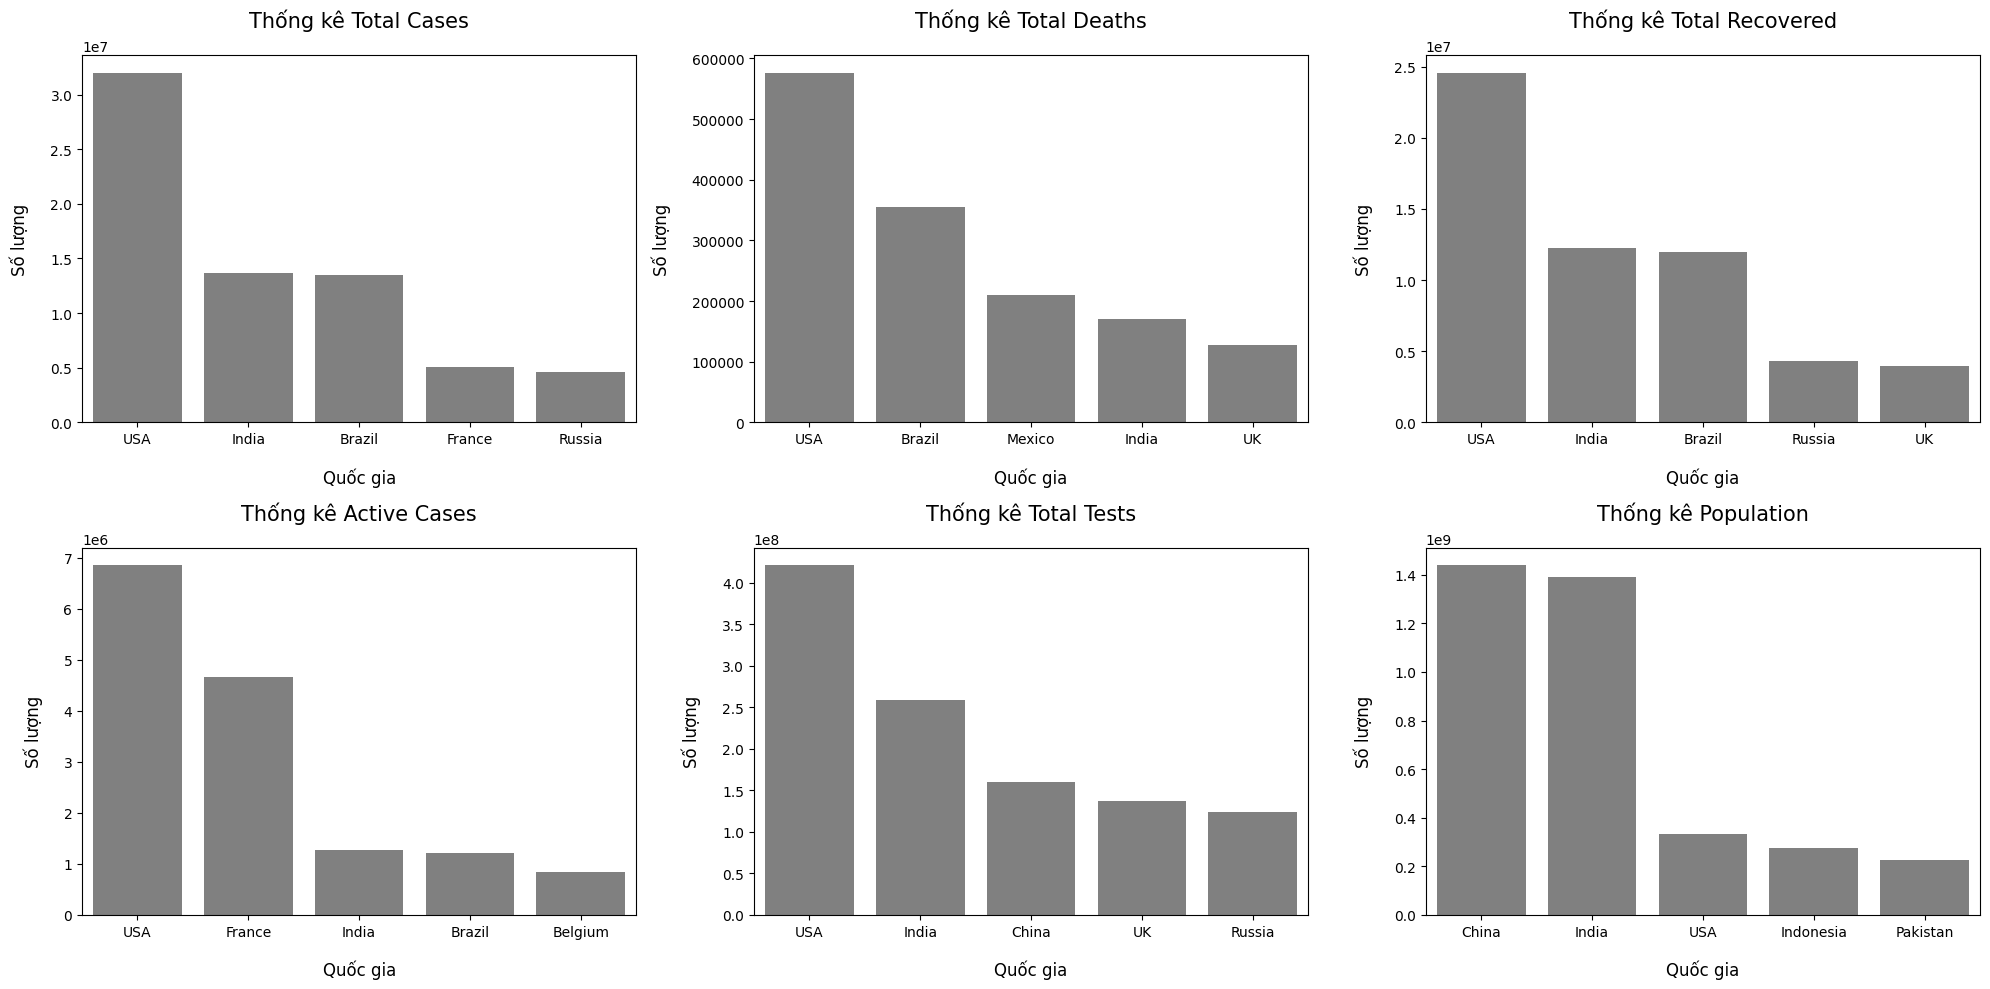

In [11]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

def plot_top_countries(df, feature, ax):
    df_top = df.sort_values(feature, ascending=False).head()
    sn.barplot(x='Country Name', y=feature, data=df_top, color='grey', ax=ax)
    ax.set_title(f'Thống kê {feature}', fontsize=15, pad=20)
    ax.set_xlabel('Quốc gia', fontsize=12, labelpad=15)
    ax.set_ylabel('Số lượng', fontsize=12, labelpad=15)

features = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Tests', 'Population']
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i, feature in enumerate(features):
    plot_top_countries(df, feature, ax=axs[i//3, i%3])

plt.tight_layout()
plt.show()

**TODO**: Comment about the chart

This statistical chart provides an overview of COVID-19 indicators in the world. The United States has the highest number of infected cases, deaths, recovered cases, positive cases, and COVID cases. India and Brazil have the second and third highest number of infected cases and recovered cases, respectively.

Body:

+ The United States has a significant lead over other countries in all COVID-19 indicators.
+ India and Brazil have similar numbers of infected cases and recovered cases.
+ Brazil has twice as many deaths as India.
+ Brazil and India have lower numbers of positive cases than France.
+ India has the second highest number of tests and China has the third highest number of tests.

Conclusion:

The United States, India, and Brazil are the three countries with the highest number of COVID-19 indicators. The United States has a significant lead over the other two countries.

### Requirement #3: Draw world map

- Using bar chart just gives you a little bit information about numbers
- In this requirement, you are going to draw a world map with circles which shows the number of cases for each country. Specifically, you are provided a file named `coord.csv` that contains longitude and latitude of each country. You are going to use `Total cases` and `Total Death` to draw the following charts

In [12]:
with open('./data/coord.json') as f:
    coord = json.load(f)

coord = pd.DataFrame(coord).reset_index().rename(columns={'index': 'Country Name', 'lat': 'Latitude', 'long': 'Longitude'})
merged_df = pd.merge(df, coord, on='Country Name')
merged_df.drop(['Total Recovered', 'Active Cases', 'Total Tests', 'Population'], axis=1, inplace=True)


In [13]:
merged_df.head()

,Country Name,Total Cases,Total Deaths,Latitude,Longitude
0,USA,31990143,576298.0,38.0,-97.0
1,India,13689453,171089.0,20.0,77.0
2,Brazil,13521409,355031.0,-10.0,-55.0
3,France,5067216,99135.0,46.0,2.0
4,Russia,4657883,103601.0,60.0,100.0


In [14]:
countries = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [15]:
metrics_df = geopandas.GeoDataFrame(merged_df, geometry=geopandas.points_from_xy(merged_df.Longitude, merged_df.Latitude))
metrics_df.head()

,Country Name,Total Cases,Total Deaths,Latitude,Longitude,geometry
0,USA,31990143,576298.0,38.0,-97.0,POINT (-97.00000 38.00000)
1,India,13689453,171089.0,20.0,77.0,POINT (77.00000 20.00000)
2,Brazil,13521409,355031.0,-10.0,-55.0,POINT (-55.00000 -10.00000)
3,France,5067216,99135.0,46.0,2.0,POINT (2.00000 46.00000)
4,Russia,4657883,103601.0,60.0,100.0,POINT (100.00000 60.00000)


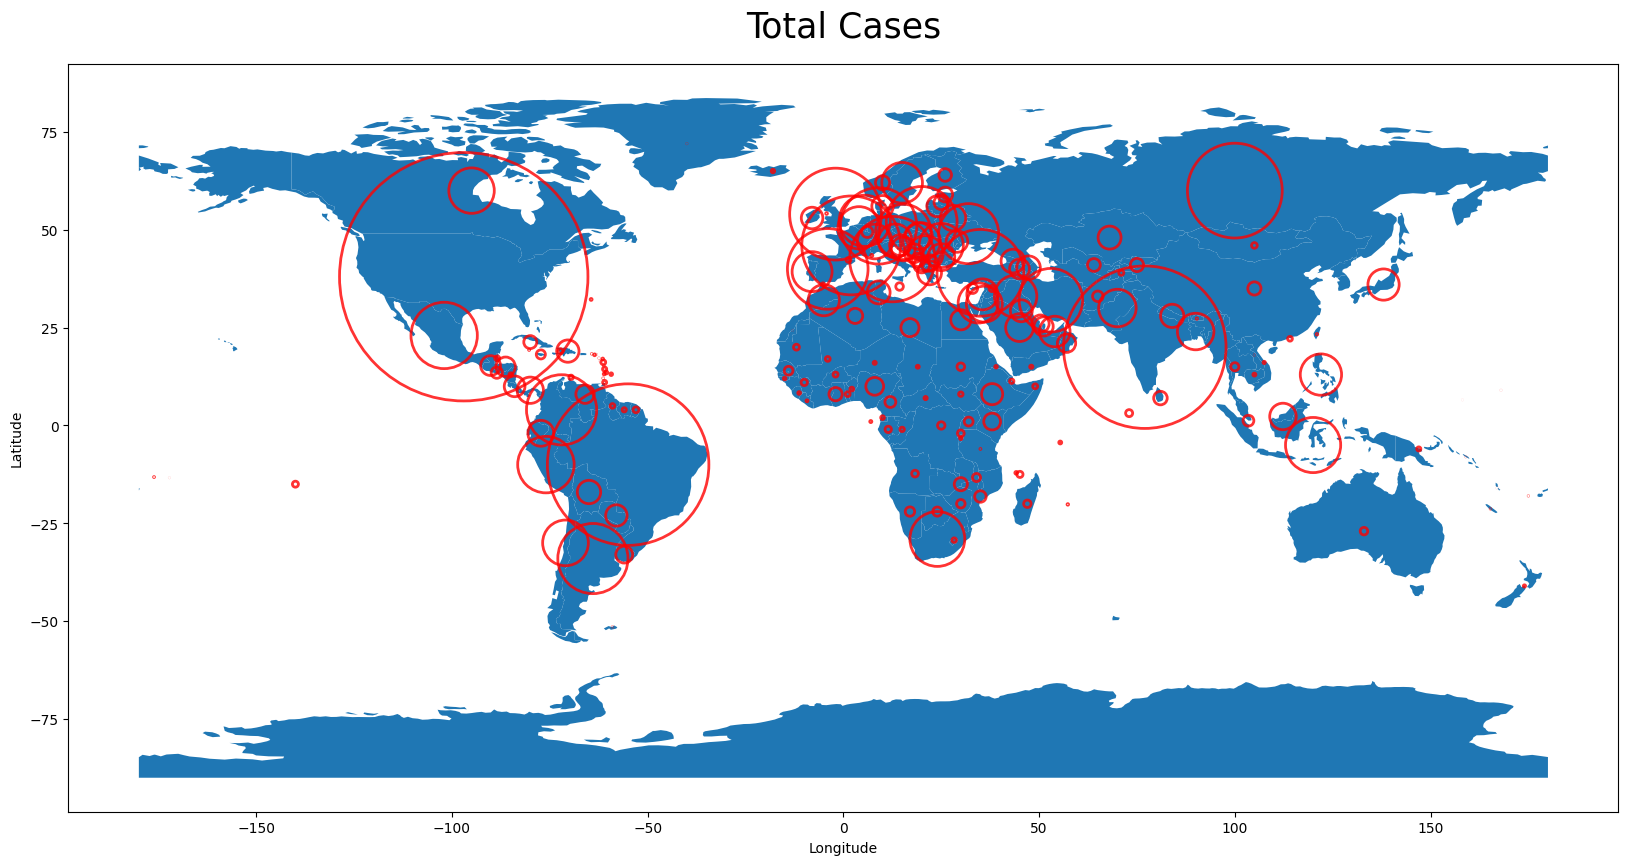

In [16]:
base = countries.plot(figsize=(20, 10))
metrics_df.plot(ax=base, markersize=metrics_df['Total Cases']/1000, alpha=0.8, facecolor='none', linewidth=2, marker='o', edgecolor='red')
plt.title('Total Cases', fontsize=25, pad=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

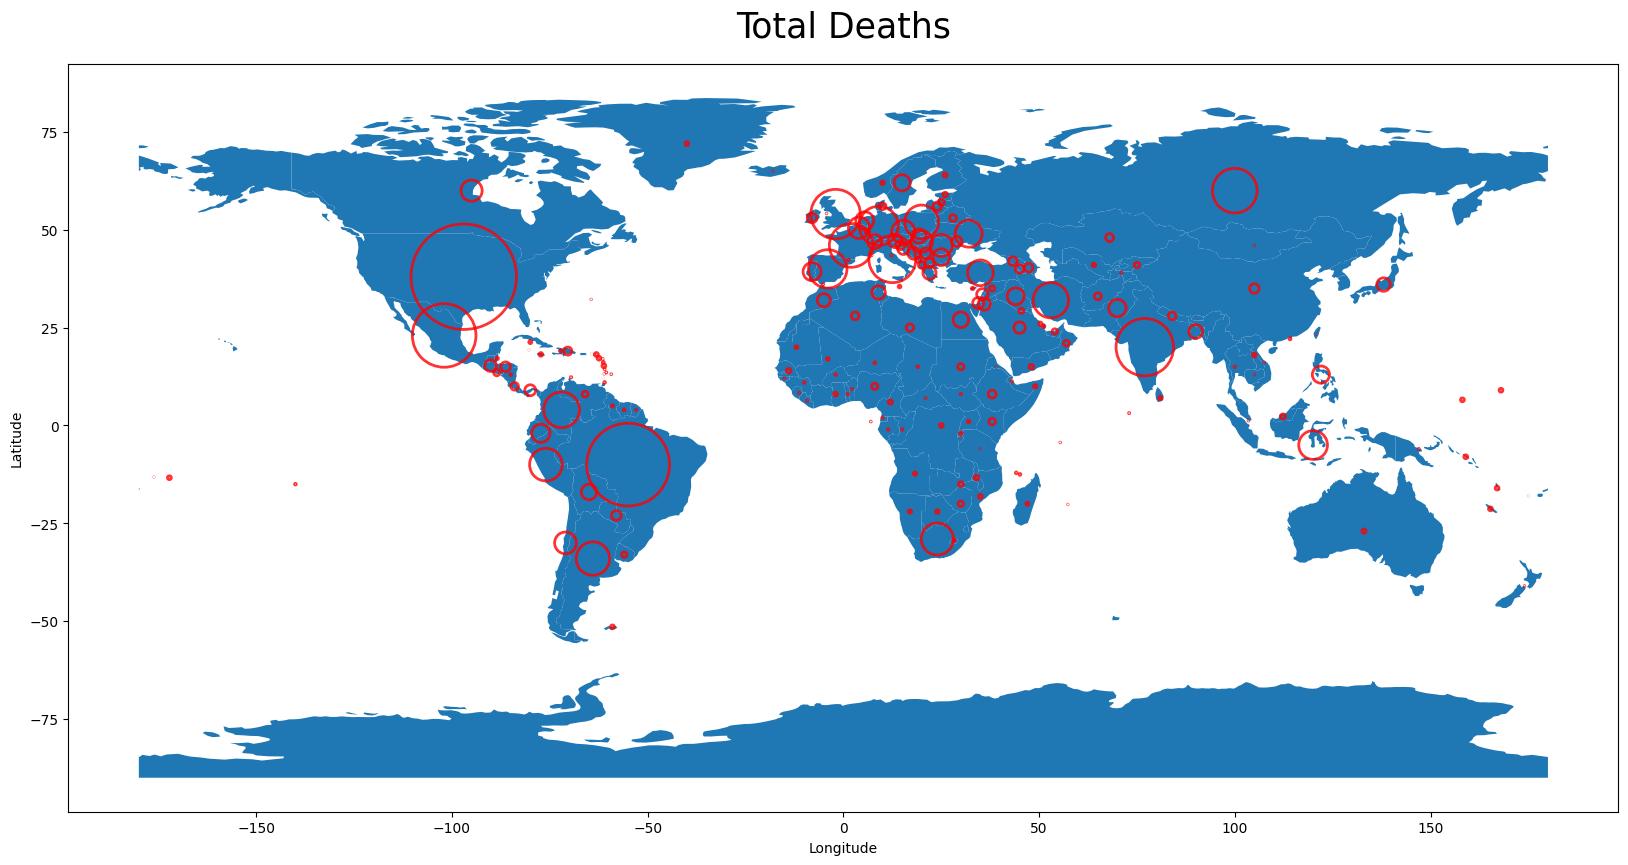

In [17]:
base = countries.plot(figsize=(20, 10))
metrics_df.plot(ax=base, color='red', markersize=metrics_df['Total Deaths']/100, alpha=0.8, facecolor='none', linewidth=2, marker='o', edgecolor='red')

plt.title('Total Deaths', fontsize=25, pad=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**TODO**: Comment about the chart


The charts provided show the global distribution of COVID-19 cases and deaths, as of December 2023. The data highlights the uneven impact of the pandemic, with some countries having a much higher burden of disease than others.

The countries with the highest number of cases and deaths are generally located in North America, Europe, and South America. These countries have densely populated urban areas and high levels of international travel, which has contributed to the spread of the virus.

The countries with the lowest number of cases and deaths are generally located in remote or sparsely populated areas. These countries have also implemented stricter border controls and other public health measures to help contain the virus.

It is important to note that the charts only show the total number of cases and deaths reported to the World Health Organization (WHO). The actual number of cases and deaths is likely to be much higher, as many people may have been infected with the virus without being tested or reported.

Overall, the charts provide a snapshot of the global COVID-19 pandemic and highlight the importance of continued public health measures to help control the spread of the virus.

### Requirement #4: Relationship between 2 variables

- Exploring the relationship between variables is a needed task to do
- You will start with exploring the linear relationship between 2 variables. In order to do so, draw $C_6^2=15$ scatter plots. For each plot, draw a line that shows the linear relationship of variables. You should implement the line yourself instead of using library.

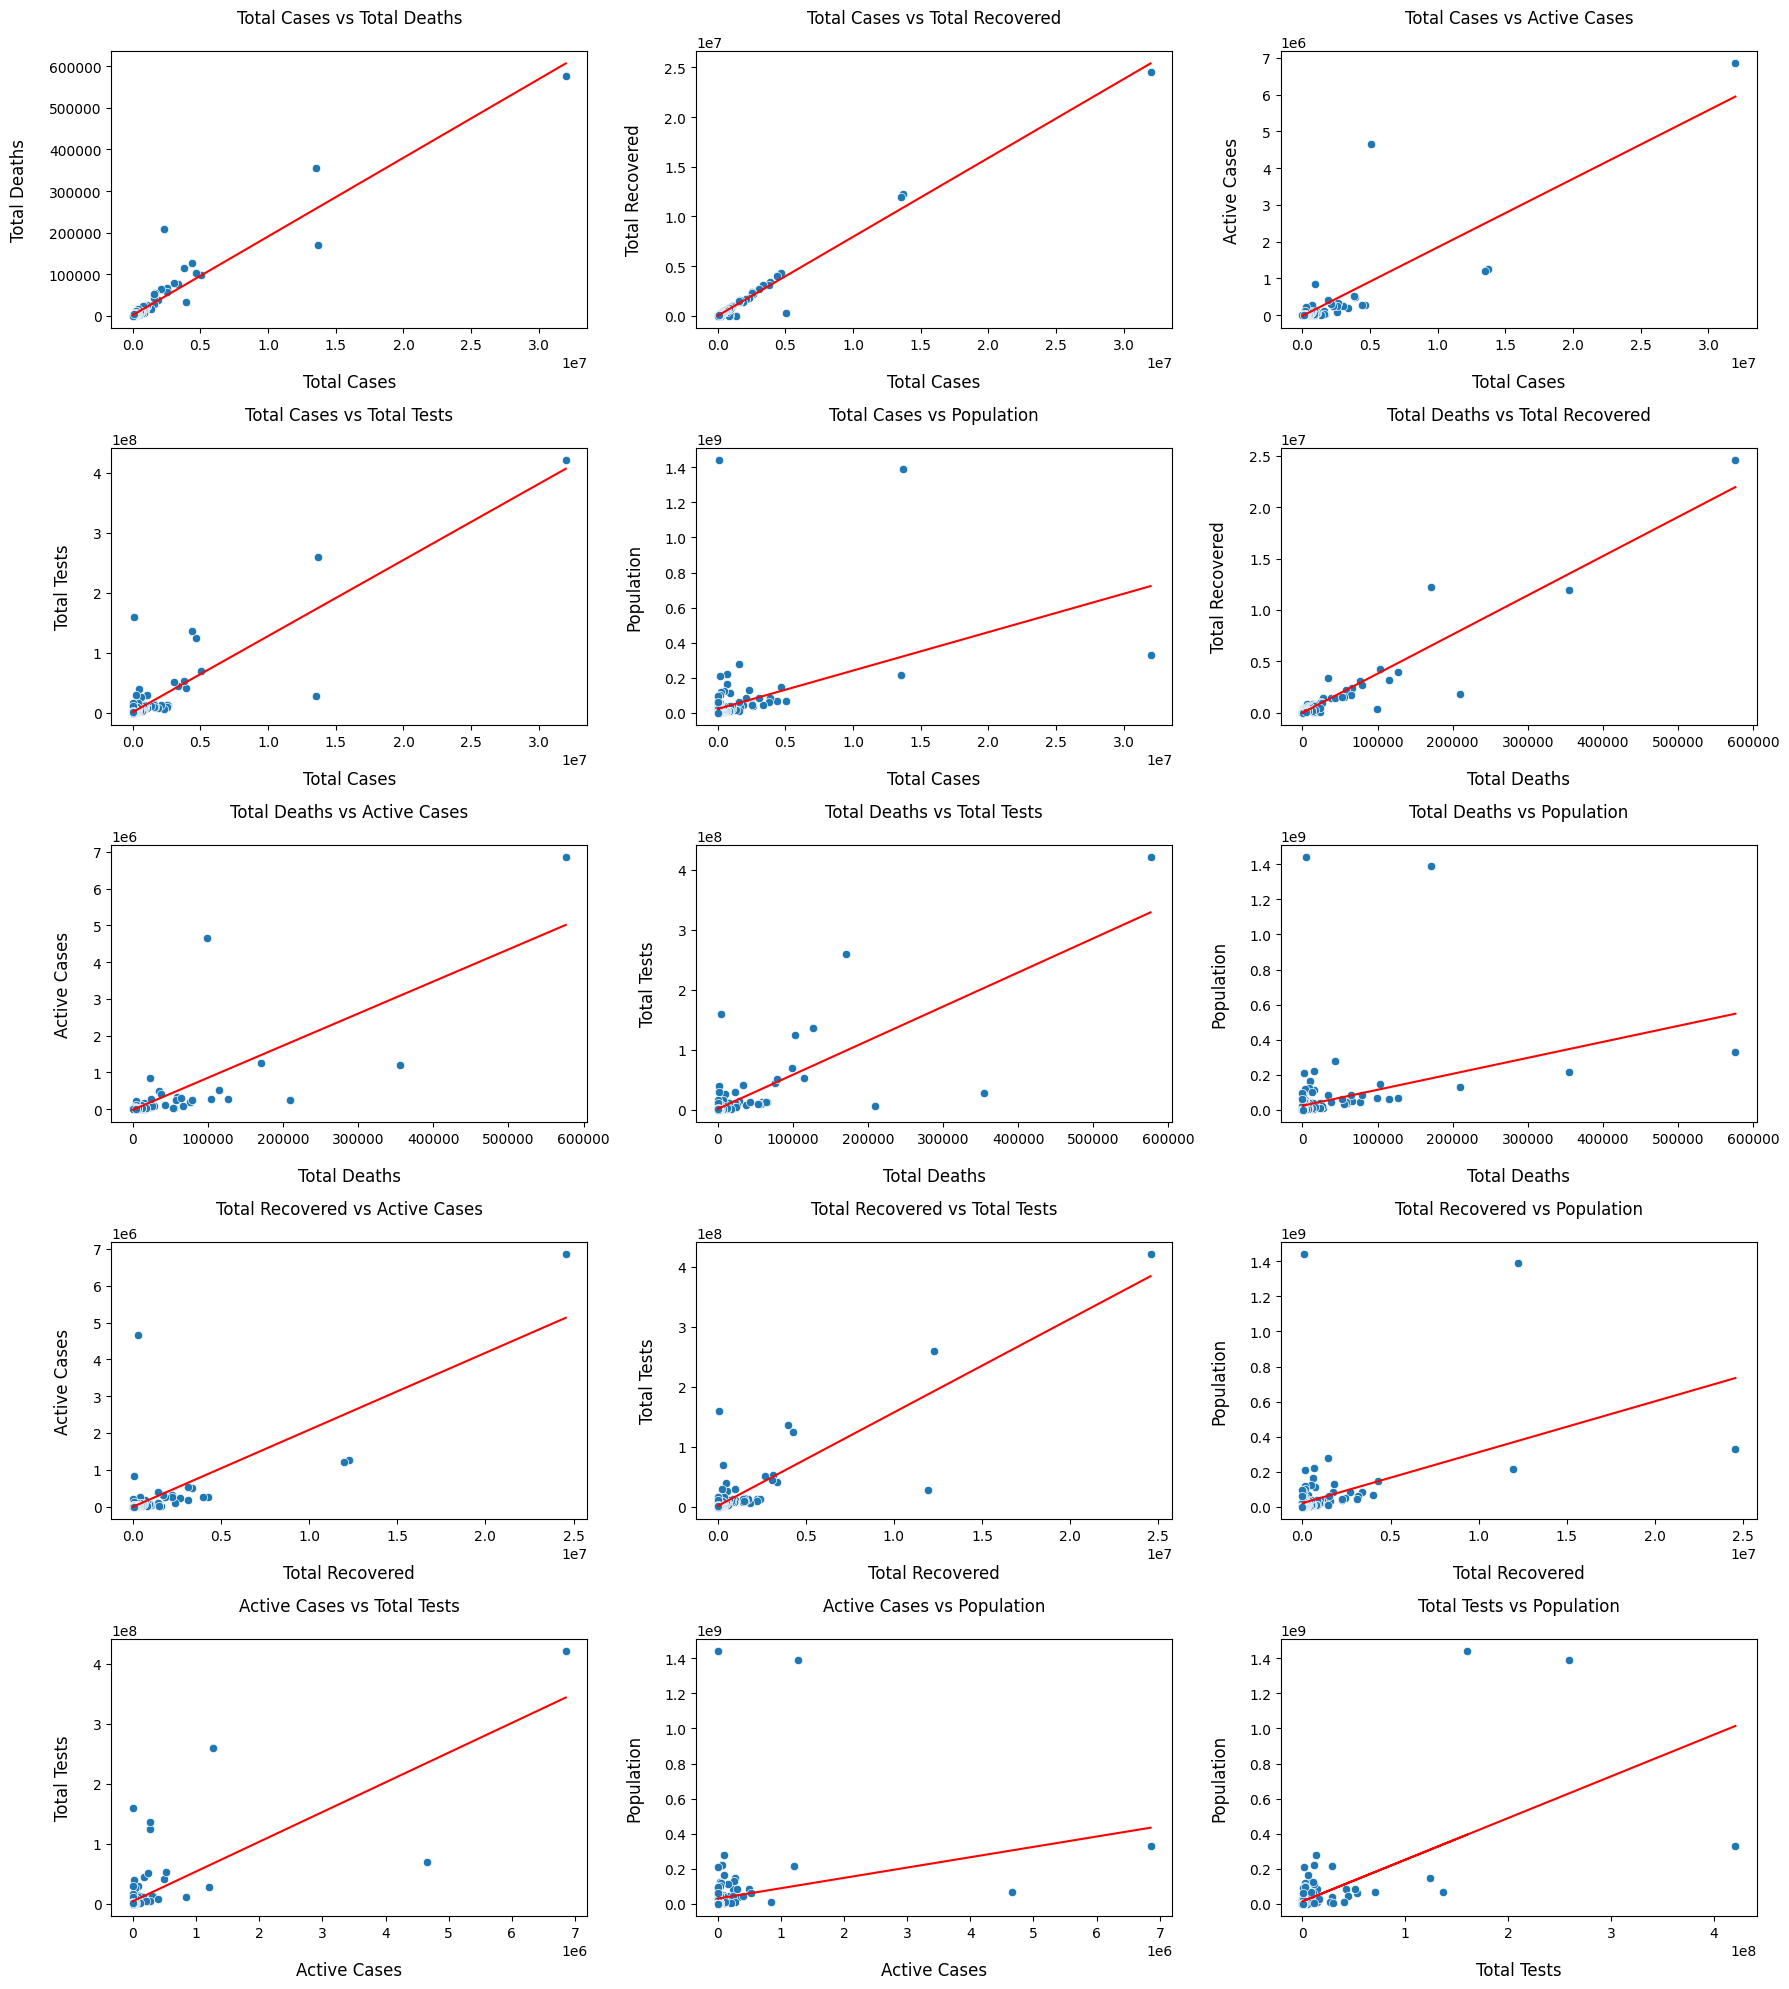

In [18]:
from scipy import stats


features = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Tests', 'Population']
fig, axs = plt.subplots(5, 3, figsize=(18, 20))

subplot_position = 0
for i, feature_i in enumerate(features):
    for j, feature_j in enumerate(features):
        if i < j:
            x_subplot = subplot_position // 3
            y_subplot = subplot_position % 3
            x, y = df[feature_i], df[feature_j]
            
            slope, intercept, r, p, std_err = stats.linregress(x, y)
            def myfunc(x):
                return slope * x + intercept
            
            axs[x_subplot, y_subplot].plot(x, myfunc(x), color='red')
            sn.scatterplot(x=feature_i, y=feature_j, data=df, ax=axs[x_subplot, y_subplot])
            
            axs[x_subplot, y_subplot].set_title(f'{feature_i} vs {feature_j}', fontsize=12, pad=20)
            axs[x_subplot, y_subplot].set_xlabel(feature_i, fontsize=12, labelpad=15)
            axs[x_subplot, y_subplot].set_ylabel(feature_j, fontsize=12, labelpad=15)
            
            subplot_position += 1

plt.tight_layout()
plt.show()

**TODO**: As showed above, give your prediction about the relationship between each pair.

+ Total Cases vs Total Deaths: Positive correlation. As the number of total cases increases, the number of total deaths is also likely to increase.
  
+ Total Cases vs Total Recovered: Positive correlation. As the number of total cases increases, the number of total recovered cases is also likely to increase.
  
+ Total Cases vs Active Cases: Positive correlation. As the number of total cases increases, the number of active cases is also likely to increase.
  
+ Total Cases vs Total Tests: Positive correlation. As the number of total cases increases, the number of total tests is also likely to increase.
  
+ Total Cases vs Population: Positive correlation. As the population increases, the number of total cases is also likely to increase.
  
+ Total Deaths vs Total Recovered: Positive correlation. As the number of total deaths increases, the number of total recovered cases is also likely to increase. However, the correlation is not as strong as the correlation between total cases and total recovered cases. This is because some people may die before they have a chance to recover.
  
+ Total Deaths vs Active Cases: Negative correlation. As the number of total deaths increases, the number of active cases is likely to decrease. This is because people who have died are no longer considered to be active cases.
  
+ Total Deaths vs Total Tests: Positive correlation. As the number of total deaths increases, the number of total tests is also likely to increase. This is because countries are likely to increase testing when there is a high number of deaths.
  
+ Total Deaths vs Population: Positive correlation. As the population increases, the number of total deaths is also likely to increase.
  
+ Total Recovered vs Active Cases: Negative correlation. As the number of total recovered cases increases, the number of active cases is likely to decrease. This is because people who have recovered are no longer considered to be active cases.
  
+ Total Recovered vs Total Tests: Positive correlation. As the number of total recovered cases increases, the number of total tests is also likely to increase. This is because countries are likely to increase testing when there is a high number of recovered cases.
  
+ Total Recovered vs Population: Positive correlation. As the population increases, the number of total recovered cases is also likely to increase.
  
+ Active Cases vs Total Tests: Positive correlation. As the number of active cases increases, the number of total tests is also likely to increase. This is because countries are likely to increase testing when there is a high number of active cases.
  
+ Active Cases vs Population: Positive correlation. As the population increases, the number of active cases is also likely to increase.
  
+ Total Tests vs Population: Positive correlation. As the population increases, the number of total tests is also likely to increase.
  
Overall, there is a positive correlation between most pairs of COVID-19 indicators. This is because as the pandemic spreads, all of the indicators are likely to increase.

### Requirement #5: Double check the relationship between 2 variables

- In order to make sure about the linear relationship, you have to check each pair with **Pearson correlation coefficient**
- Specifically, $\rho$ is calculated as follows:

$$\rho_{X, Y} = \frac{cov(X, Y)}{\sigma_X \sigma_Y}$$

- Then, plot these 15 values using heatmap

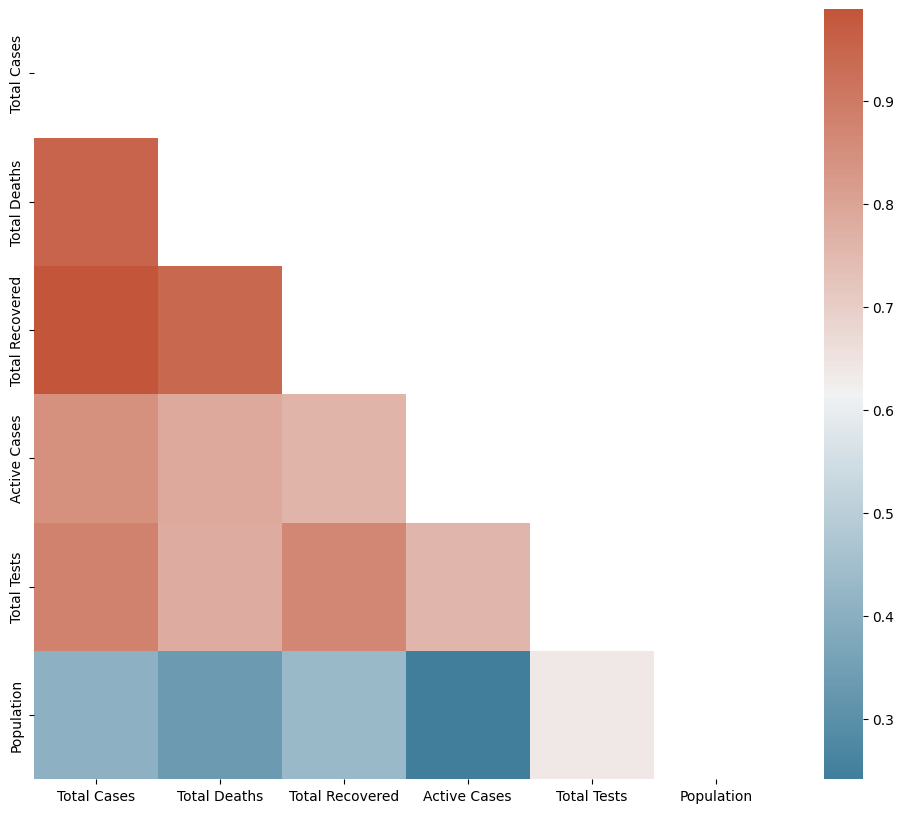

In [19]:
features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_corr = df[features].corr(method='pearson')

mask = np.triu(np.ones_like(df_corr, dtype=bool))

f, ax = plt.subplots(figsize=(12, 10))
cmap = sn.diverging_palette(230, 20, as_cmap=True)
sn.heatmap(df_corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", annot_kws={'size':10})

plt.show()

For now, you can check whether your prediction is right or wrong!

## Model visualization

- In this section, we are going to visualize the training and testing process of machine learning model
- The process of training and testing a model is as follow:
    1. Prepare data for training and testing
    2. Create a model
    3. Train and test the model
    4. Visualize the result

- You are required to:
    1. Study Multi-layer neural network and Convolutional neural network
    2. Study `Pytorch` in order to prepare data and design machine learning model
    3. Design 2 models to classify MNIST dataset. Then, visualize the result of each model and compare the result to each other
        - Model 1: A fully-connected model with 4 layers. The input layer has $784$ neurons. The hidden layer #1 has $1024$ neurons, which is followed by a $ReLU$ as activation functions. The hidden layer #2 has $512$ neurons, also followed by a $ReLU$ as activation functions. The output layer has $10$ neurons (of course), which follows by a $LogSoftmax$ function
        - Model 2: A CNN model with 2 Convolution layers and 1 linear layer. All the CNN layers have 20 filters, kernel size equal to $5$. Each of them is followed by a $ReLU$ activation function and a MaxPooling2D layer ($kernel\_size=2$). The linear layer is followed by a $LogSoftmax$ activation function

- Google Colab can be used since it provides free GPU, which makes your training and testing process faster

### Requirement #6: Prepare data

- `Pytorch` supports a lot of datasets for running machine learning model. In this lab, we use MNIST dataset. So, download the training set and the testing set using `Pytorch` and store them in `./data`
- Note that you have to transform your data into `tensor` (a datatype that's quite similar to `numpy array`) so you can input to model
- After that, create `train_dataloader` and `test_dataloader`

**TODO**: Explain why we have to create dataloader

The PyTorch `DataLoader` class is a powerful utility class that is essential for loading and preprocessing data for deep learning models. It provides efficient data loading, data augmentation, flexibility, and shuffling capabilities, making it a popular choice for deep learning practitioners.

In [20]:
# TODO: download training, testing data and store them into training_data and testing_data
# Then, create train_dataloader and test_dataloader with batch_size=32

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
testing_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=32)
test_dataloader = DataLoader(testing_data, batch_size=32)


- After downloading the data, visualize 10 random samples (2 rows, 5 samples for each row) from training set.

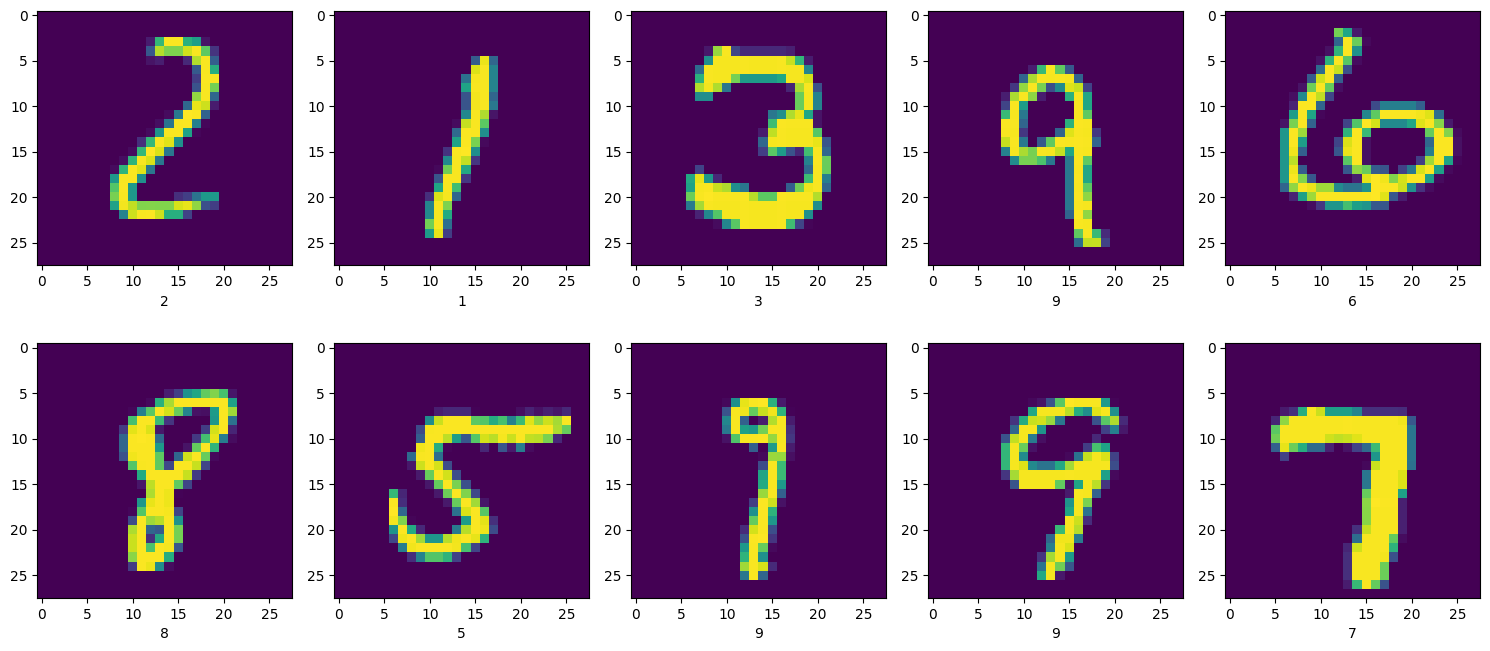

In [21]:
# TODO: visualize 10 random samples

fig, axs = plt.subplots(2, 5, figsize=(15, 7))
for i in range(2):
    for j in range(5):
        index = random.randint(0, len(training_data))
        image, label = training_data[index]
        axs[i, j].imshow(image.squeeze(), cmap='viridis')
        axs[i, j].set_xlabel(f'{label}', fontsize=10)
        
plt.tight_layout()
plt.show()

### Requirement #7: Create models

- Create 2 models as mentioned above. Call them `Mnist_FC` and `Mnist_CNN`
- **I strongly recommend that you should slowly implement, print out the output and its shape of each layer in order to get a deep understanding of what you are trying to do**
- Before moving to the next requirement, you should test your model with a random sample of the dataset. In case you create code cells for testing, remember to remove these cells

In [22]:
import torch.nn as nn
import torch.nn.functional as F

class Mnist_FC(nn.Module):
    def __init__(self):
        super(Mnist_FC, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)
        return x

class Mnist_CNN(nn.Module):
    def __init__(self):
        super(Mnist_CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, kernel_size=(5, 5))
        self.conv2 = nn.Conv2d(20, 20, kernel_size=(5, 5))
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(4*4*20, 10)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, (2, 2))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, (2, 2))
        x = self.flatten(x)
        x = F.log_softmax(self.fc1(x), dim=1)
        return x

### Requirement #8: Train and test models

- Design `train` and `test` function with the parameters provided in the following code cell
    - `train` function trains the model with all the data in training set
    - `test` function tests the model with all data in testing set

- Return the accuracy (e.g. $0.847351$) after training and testing

**TODO**: Explain the parameters of `train` and `test` function. In `test` function, there is a line of code that says `with torch.no_grad()`. Why do we have this line of code?

1. The parameters of `train` and `test` function:
+ `train` function
  + `dataloader`: This is a data loader object that provides batches of training data.
  + `model`: This is the model to be trained.
  + `loss_fn`: This is the loss function to be used to evaluate the model's predictions.
  + `optimizer`: This is the optimizer to be used to update the model's parameters.
+ `test` function
  + `dataloader`: This is a data loader object that provides batches of test data.
  + `model`: This is the trained model.

2. Explain code `with torch.no_grad()`:

+ With torch.no_grad() method is like a loop in which every tensor in that loop will have a requires_grad set to False. It means that the tensors with gradients currently attached to the current computational graph are now detached from the current graph and no longer we will be able to compute the gradients with respect to that tensor. Until the tensor is within the loop it is detached from the current graph. As soon as the tensor defined with gradient is out of the loop, it is again attached to the current graph. This method disables the gradient calculation which reduces the memory consumption for computations.

In [23]:
# check gpu
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using {device} for training and testing')

def train(dataloader, model, loss_fn, optimizer):
    correct = 0
    
    for data, target in dataloader:
        data, target = data.to(device), target.to(device)
        
        output = model(data)
        loss = loss_fn(output, target)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        correct += (output.argmax(1) == target).type(torch.float).sum().item()

    acc = correct / len(dataloader.dataset)
    return acc

def test(dataloader, model):
    correct = 0
    model.eval()

    with torch.no_grad():
        for data, target in dataloader:
            data, target = data.to(device), target.to(device)
            
            output = model(data)
            
            correct += (output.argmax(1) == target).type(torch.float).sum().item()

    acc = correct / len(dataloader.dataset)
    return acc

Using cpu for training and testing


- Run 20 epochs for each model. In order to do so, at fist, you have to define `learning_rate, loss_fn` and `optimizer`. I will help you on that

- Save the history of training and testing process as `history_fc` and `history_cnn`. During the running process, you should print out the accuracy in order to keep track

- The history is a dictionary with the following structure:

```python
history = {
    1: [0.6, 0.5], # the key (type: int) is the epoch
    2: [0.7, 0.6], # the value (type: list) contains the accuracy of training and testing process at the corresponding epoch
    ...
}
```

**TODO**: List out some loss functions and optimizers that you have heard about

1. Loss Functions

+ Mean Squared Error (MSE): MSE is a commonly used loss function for regression tasks. It measures the average squared difference between the predicted outputs and the actual targets.

+ Binary Cross-Entropy (BCE): BCE is used for binary classification tasks, where the model predicts the probability of an instance belonging to one of two classes. It measures the cross-entropy between the predicted probabilities and the actual class labels.

+ Categorical Cross-Entropy (CCE): CCE is a generalization of BCE for multi-class classification tasks. It measures the cross-entropy between the predicted probability distribution over all classes and the actual class label.

+ Hinge Loss: Hinge loss is used for maximum margin classification tasks. It aims to maximize the margin between the correct class and the other classes.

+ KL Divergence: KL Divergence measures the difference between two probability distributions. It is often used in generative models to ensure that the generated data resembles the real data distribution.

2. Optimizers

+ Stochastic Gradient Descent (SGD): SGD is a simple and widely used optimizer that updates the model parameters in the direction of the negative gradient of the loss function.

+ Momentum SGD: Momentum SGD is a variant of SGD that adds momentum to the gradient updates, helping the optimizer to escape local minima and converge to a better solution.

+ Adagrad: Adagrad is an optimizer that adapts the learning rate for each parameter based on its past gradients. This helps to prevent exploding gradients and improve convergence.

+ RMSprop: RMSprop is another optimizer that adapts the learning rate, but it uses the root mean square of past gradients instead of the sum. This makes it less sensitive to outliers than Adagrad.

+ Adam: Adam is a popular optimizer that combines the strengths of Momentum SGD, Adagrad, and RMSprop. It is often the default optimizer of choice for many machine learning tasks.

In [24]:
def run_model(model, train_dataloader, test_dataloader):
    epochs = 20
    loss_fn = nn.CrossEntropyLoss()
    learning_rate = 1e-3
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    history = {}
    
    for epoch in range(epochs):
        train_acc = train(train_dataloader, model, loss_fn, optimizer)
        test_acc = test(test_dataloader, model)
        history[epoch+1] = [round(train_acc, 4), round(test_acc, 4)]
        
        print(f'Epoch {epoch+1}')
        print('-------------------------------')
        print(f'Training acc: {train_acc: .3f}')
        print(f'Testing acc: {test_acc: .3f}')
    return history


In [25]:
print('========== FC model ==========')
model = Mnist_FC().to(device)
history_fc = run_model(model, train_dataloader, test_dataloader)
print('========== CNN model ==========')
model = Mnist_CNN().to(device)
history_cnn = run_model(model, train_dataloader, test_dataloader)

========== FC model ==========
Epoch 1
-------------------------------
Training acc:  0.453
Testing acc:  0.635
Epoch 2
-------------------------------
Training acc:  0.671
Testing acc:  0.708
Epoch 3
-------------------------------
Training acc:  0.732
Testing acc:  0.779
Epoch 4
-------------------------------
Training acc:  0.798
Testing acc:  0.824
Epoch 5
-------------------------------
Training acc:  0.833
Testing acc:  0.850
Epoch 6
-------------------------------
Training acc:  0.853
Testing acc:  0.867
Epoch 7
-------------------------------
Training acc:  0.868
Testing acc:  0.877
Epoch 8
-------------------------------
Training acc:  0.877
Testing acc:  0.886
Epoch 9
-------------------------------
Training acc:  0.884
Testing acc:  0.890
Epoch 10
-------------------------------
Training acc:  0.890
Testing acc:  0.895
Epoch 11
-------------------------------
Training acc:  0.894
Testing acc:  0.899
Epoch 12
-------------------------------
Training acc:  0.897
Testing acc:  

### Requirement #9: Visualize

- Produce a graph as the following code cell and comment about the running process of 2 models

**TODO**: Your comment

The chart you sent shows the training and testing accuracy of a CNN model and a FC model for image classification. The CNN model has higher training and testing accuracy than the FC model.

This is because CNN models are better at extracting spatial features from images. CNN models use convolutional layers and pooling layers to learn spatial features, while FC models do not. Convolutional layers learn to identify patterns in the image, while pooling layers reduce the dimensionality of the feature maps.

The FC model has higher training accuracy than testing accuracy. This is a sign of overfitting. Overfitting occurs when the model learns the training data too well and is unable to generalize to new data.

Overall, the CNN model is performing better than the FC model for image classification. This is because CNN models are better at extracting spatial features from images.

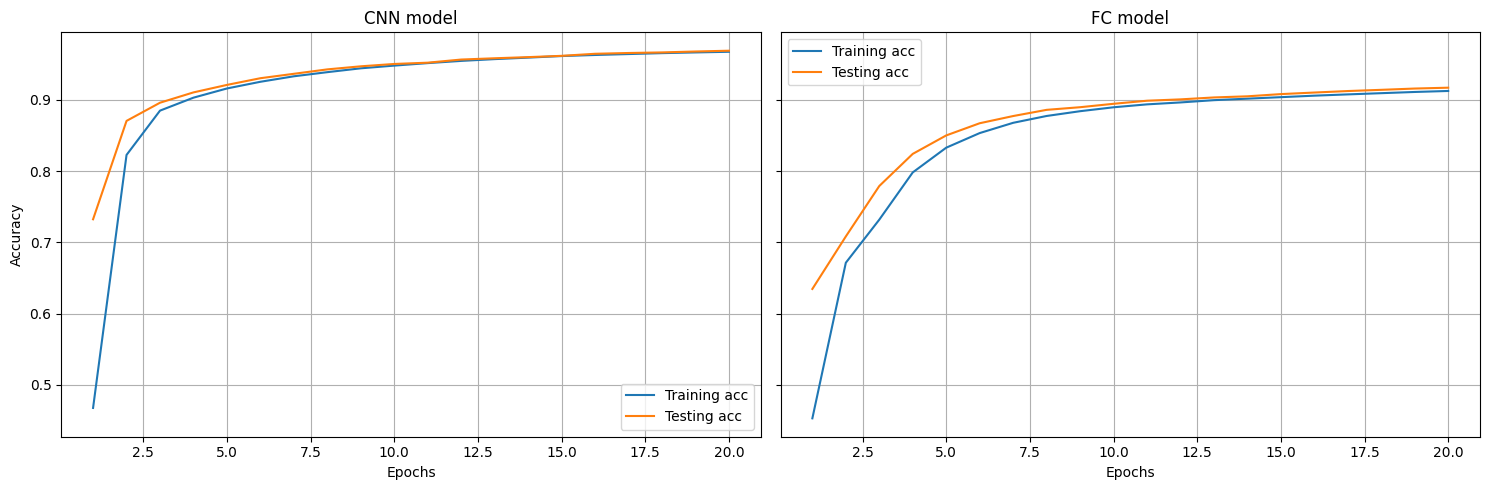

In [26]:
def plot_model_history(ax, history, title):
    df = pd.DataFrame(history).T
    df.columns = ['Training acc', 'Testing acc']
    sn.lineplot(data=df, ax=ax, dashes=False)
    ax.set_title(title)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')  # Set y-label on each axis

# Create a 1x2 subplot layout
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Plot the history for both models
plot_model_history(axs[0], history_cnn, 'CNN model')
plot_model_history(axs[1], history_fc, 'FC model')

# Add legend to the bottom right
axs[0].legend(loc='lower right')
axs[1].legend(loc='upper left')  
axs[1].set_ylabel('Accuracy')

# Adjust the layout for better visualization
plt.tight_layout()

axs[0].grid()
axs[1].grid()

# Display the plot
plt.show()

- Highly recommend you go play around with the parameters of models and re-implement 2 models using `TensorFlow` on Colab

In [27]:
# TODO: create Mnist_FC and Mnist_CNN

import tensorflow as tf


Mnist_FC = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

Mnist_FC.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

Mnist_CNN = tf.keras.Sequential([
  tf.keras.layers.Conv2D(20, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(20, kernel_size=(5, 5), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])

Mnist_CNN.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
